In [2]:
import pandas as pd
import numpy as np
from urllib.request import urlopen
import bs4
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [3]:
import datetime as dt
print(dt.datetime.now())

2020-07-07 21:53:01.693432


In [4]:
page_n = 1
idx = 'https://dhlottery.co.kr/gameResult.do?method=byWin&drwNo='+str(page_n)

In [6]:
source = urlopen(idx).read()
source= bs4.BeautifulSoup(source,'html.parser')

In [5]:
sentence = source.find("meta", {"name":"description"}).get('content')

In [6]:
sentence

'동행복권 1회 당첨번호 10,23,29,33,37,40+16. 1등 총 0명, 1인당 당첨금액 0원.'

In [7]:
import re
tmp = sentence.split('당첨번호')[1].split('.')[0].lstrip().split(',')
last = tmp[-1].split('+')
tmp

['10', '23', '29', '33', '37', '40+16']

In [8]:
tmp.remove(tmp[-1])
tmp.append(last[0])
tmp.append(last[1])
tmp

['10', '23', '29', '33', '37', '40', '16']

In [9]:
# 마지막 날짜 추출
# <select id="dwrNoList" title="회차 선택">
x=str(source.find('select',{'id':'dwrNoList'}).find('option'))
x= x.split('>')[1].split('<')[0]
x= int(x)
x

918

In [10]:
adress = 'https://dhlottery.co.kr/gameResult.do?method=byWin&drwNo='+str(1) # 업데이트 되기 때문에 어느 숫자든 노상관
source = urlopen(adress).read()
source= bs4.BeautifulSoup(source,'html.parser')
last_page=str(source.find('select',{'id':'dwrNoList'}).find('option'))
last_page= last_page.split('>')[1].split('<')[0]
last_page= int(last_page)
lotto=pd.DataFrame() # 각각의 value 저장
dic={} # list를 저장하기 위한 임시 변수
for page_n in range(1,last_page+1):
    adress = 'https://dhlottery.co.kr/gameResult.do?method=byWin&drwNo='+str(page_n)
    source = urlopen(adress).read()
    source= bs4.BeautifulSoup(source,'html.parser')
    sentense = source.head.find("meta", {"name":"description"}).get('content')

    number = sentense.split('당첨번호')[1].split('.')[0].lstrip().split(',')
    last = number[-1].split('+')
    number.remove(number[-1])
    number.append(last[0])
    number.append(last[1])
    
    
    lotto['{}회'.format(page_n)]=number
    dic['{}회'.format(page_n)] = number
lotto=lotto.T
x= pd.DataFrame(pd.Series(dic,index=dic.keys()))
x.rename(columns = {0 : 'list'}, inplace = True)
lotto = pd.concat([lotto,x],axis=1,join='outer')
lotto.head()

,0,1,2,3,4,5,6,list
1회,10,23,29,33,37,40,16,"[10, 23, 29, 33, 37, 40, 16]"
2회,9,13,21,25,32,42,2,"[9, 13, 21, 25, 32, 42, 2]"
3회,11,16,19,21,27,31,30,"[11, 16, 19, 21, 27, 31, 30]"
4회,14,27,30,31,40,42,2,"[14, 27, 30, 31, 40, 42, 2]"
5회,16,24,29,40,41,42,3,"[16, 24, 29, 40, 41, 42, 3]"


In [11]:
for i in lotto.columns.difference(['list']):
    lotto[i] = lotto[i].astype(int)
lotto['list'] = lotto['list'].apply(lambda x: list(map(int,x)))

In [12]:
lotto

,0,1,2,3,4,5,6,list
1회,10,23,29,33,37,40,16,"[10, 23, 29, 33, 37, 40, 16]"
2회,9,13,21,25,32,42,2,"[9, 13, 21, 25, 32, 42, 2]"
3회,11,16,19,21,27,31,30,"[11, 16, 19, 21, 27, 31, 30]"
4회,14,27,30,31,40,42,2,"[14, 27, 30, 31, 40, 42, 2]"
5회,16,24,29,40,41,42,3,"[16, 24, 29, 40, 41, 42, 3]"
...,...,...,...,...,...,...,...,...
914회,16,19,24,33,42,44,27,"[16, 19, 24, 33, 42, 44, 27]"
915회,2,6,11,13,22,37,14,"[2, 6, 11, 13, 22, 37, 14]"
916회,6,21,22,32,35,36,17,"[6, 21, 22, 32, 35, 36, 17]"
917회,1,3,23,24,27,43,34,"[1, 3, 23, 24, 27, 43, 34]"


In [13]:
from collections import Counter
tmp=[]
for i in range(7):
    for j in range(lotto.shape[0]):
        tmp.append(lotto[i][j])
count = Counter(tmp)

In [14]:
df = pd.DataFrame(pd.Series(count,index=count.keys())).sort_values(by=0,ascending=False)
df['count'] = df[0]/lotto.shape[0]*100
df = df.reset_index()

In [15]:
df.head(6)

,index,0,count
0,43,166,18.082789
1,27,161,17.538126
2,34,159,17.320261
3,17,157,17.102397
4,1,155,16.884532
5,33,153,16.666667


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44]),
 <a list of 45 Text xticklabel objects>)

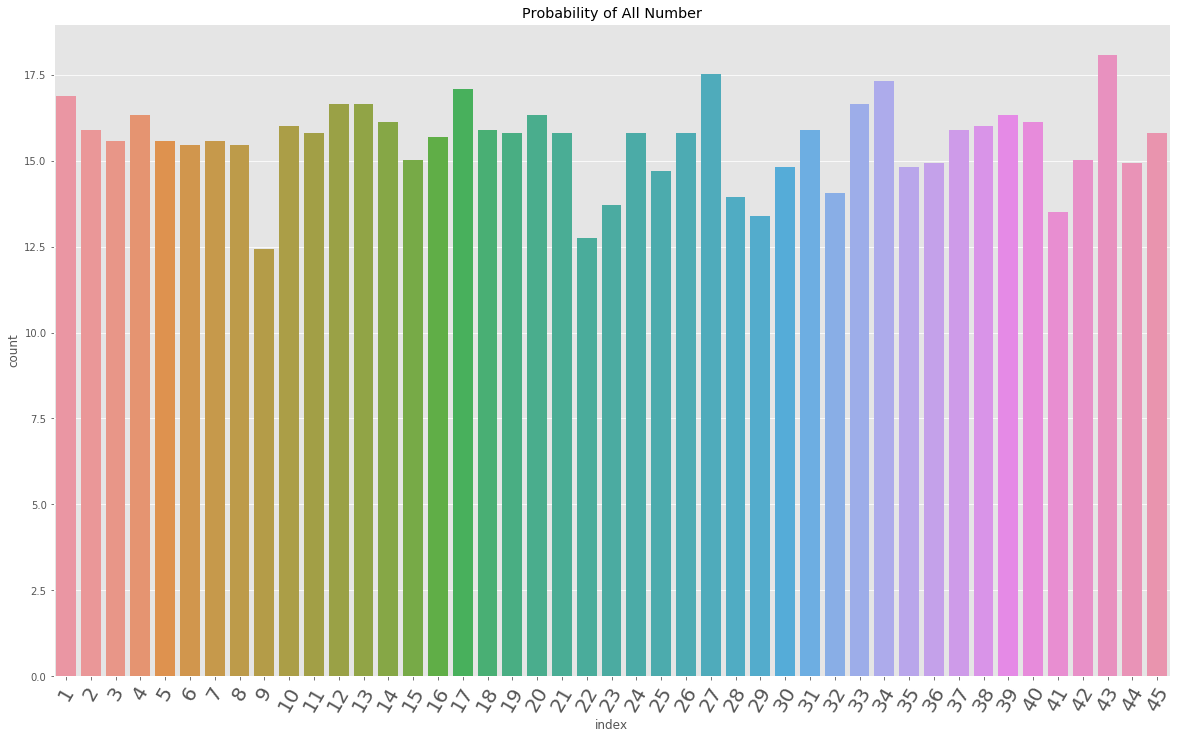

In [16]:
plt.figure(figsize=(20,12))
sns.barplot(data=df,x='index',y='count')
plt.title("Probability of All Number")
plt.xticks(fontsize=20,rotation=60)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44]),
 <a list of 45 Text yticklabel objects>)

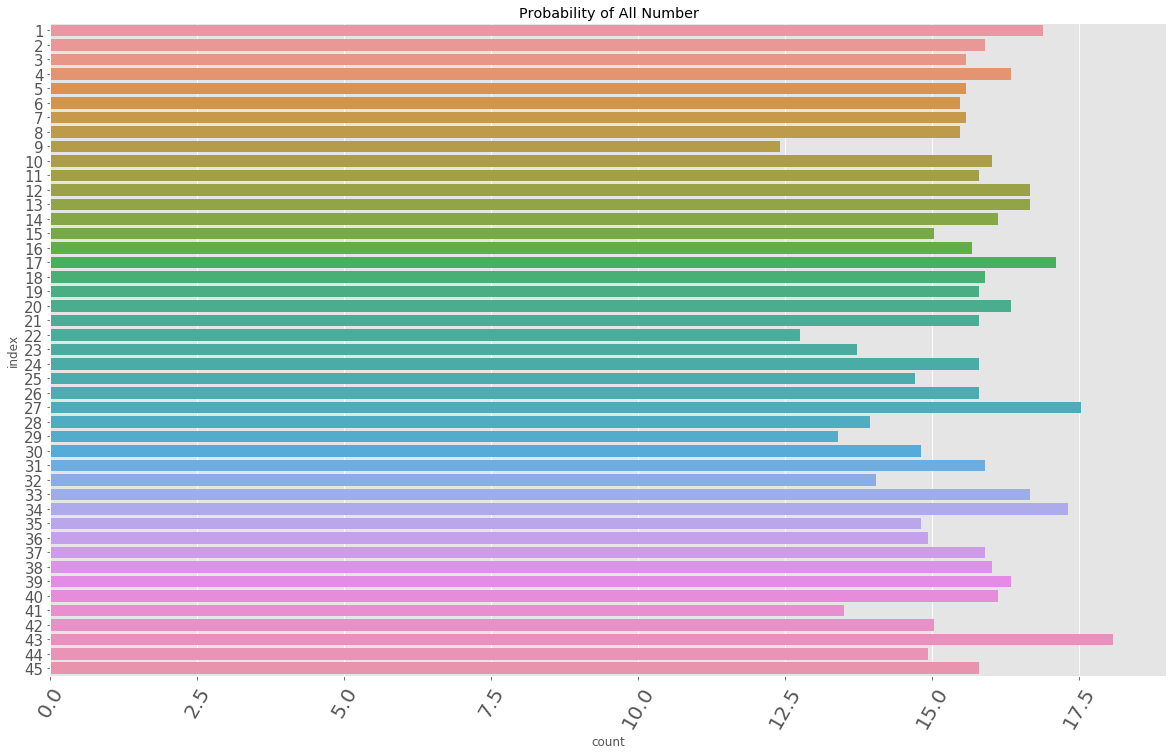

In [17]:
plt.figure(figsize=(20,12))
sns.barplot(data=df,y='index',x='count',orient='h')
plt.title("Probability of All Number")
plt.xticks(fontsize=20,rotation=60)
plt.yticks(fontsize=15)

Text(0.5, 1.0, 'Top 10')

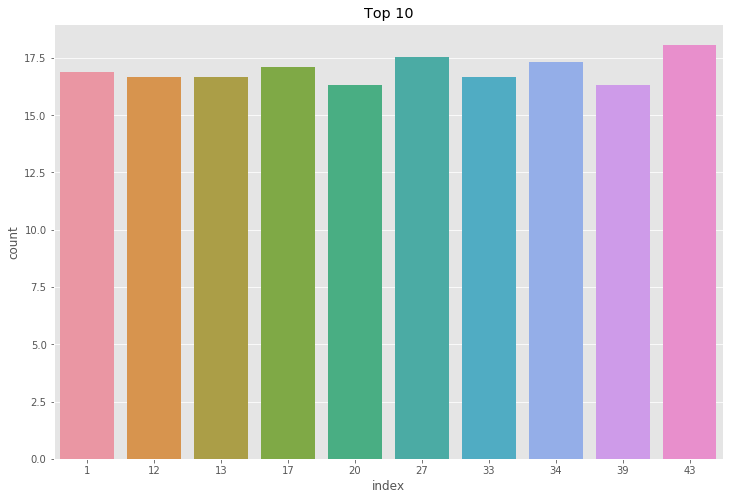

In [18]:
plt.figure(figsize=(12,8))
sns.barplot(x=df.head(10)['index'],y=df.head(10)['count'])
plt.title('Top 10')